# 01. 선형회귀모델

## 1-1. 단일선형회귀

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import torch
import torch.nn as nn # 신경망(neural network) 모듈
import torch.optim as optim # optimizer를 담고 있는 모듈

%matplotlib inline
import matplotlib.pyplot as plt

Epoch [100/2000], Loss:  86387128.0000
Epoch [200/2000], Loss:  82284328.0000
Epoch [300/2000], Loss:  80767848.0000
Epoch [400/2000], Loss:  80207312.0000
Epoch [500/2000], Loss:  80000120.0000
Epoch [600/2000], Loss:  79923544.0000
Epoch [700/2000], Loss:  79895232.0000
Epoch [800/2000], Loss:  79884768.0000
Epoch [900/2000], Loss:  79880896.0000
Epoch [1000/2000], Loss:  79879472.0000
Epoch [1100/2000], Loss:  79878944.0000
Epoch [1200/2000], Loss:  79878736.0000
Epoch [1300/2000], Loss:  79878680.0000
Epoch [1400/2000], Loss:  79878648.0000
Epoch [1500/2000], Loss:  79878648.0000
Epoch [1600/2000], Loss:  79878632.0000
Epoch [1700/2000], Loss:  79878632.0000
Epoch [1800/2000], Loss:  79878624.0000
Epoch [1900/2000], Loss:  79878640.0000
Epoch [2000/2000], Loss:  79878640.0000


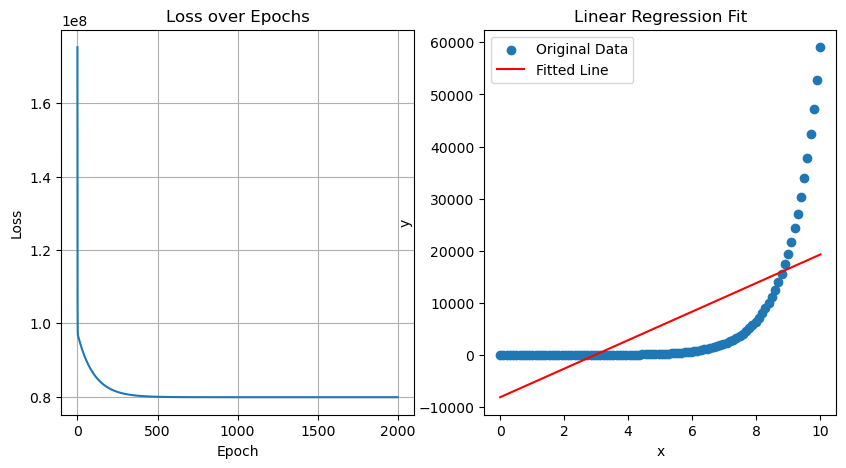

Model Parameters:
linear.weight: tensor([[2737.1895]])
linear.bias: tensor([-8062.2764])


In [ ]:
# 1. 데이터 생성
x = torch.linspace(0,10,100).view(-1,1) # 0~10사이 원소 하나씩 쪼개기, 입력 데이터
y = (3 ** x) + 2 + torch.randn(100, 1) * 2 # 레이블

# 2. 모델 정의(인공신경망 정의)
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        # self.hidden = nn.Linear(1,10) # 입력 1개, 출력 10개, 다층 모델 구성
        # self.relu = nn.ReLU() # ReLU, Sigmoid 활성화 함수 적용
        # self.output = nn.Linear(10,1)
        self.linear = nn.Linear(1,1) # 가장 기본적 인공신경망, 입력 1개, 출력 1개

    def forward(self, x): # foward : 데이터를 순방향을 통과시켜줌
        return self.linear(x)
        # x = self.hidden(x)
        # x = self.relu(x)
        # x = self.output(x)
        # return x
    
model = LinearRegressionModel()

# 3. 손실함수, 옵티마이저 정의
criterion = nn.MSELoss() # 하이퍼파라미터, 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01) # 가중치랑 편향을 넣어줌, lr : 학습률, 하이퍼파라미터, 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 200 # 학습 반복 횟수, 하이퍼파라미터
losses = [] # 손실 담아줄 리스트

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화

    outputs = model(x) # 예측값 계산, forward넣어주면서 순전파 진행
    loss = criterion(outputs, y) # 에러를 통한 손실 구함, 손실 계산
    loss.backward() # 손실을 기반으로 역전파 진행

    optimizer.step() # 가중치 업데이트

    losses.append(loss.item()) # item으로 값만 빼서 넣음

    # 백번마다 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1) # l행 2열의 1번
plt.ylim(0,5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2) # 1행 2열의 2번
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

- `nn.Sequential` : PyTorch에서 신경망 레이어들을 순차적으로 쌓아서 하나의 모델로 정의할 때 쓰는 컨테이너 클래스

Epoch [100 / 2000], Loss:  41643928.0000
Epoch [200 / 2000], Loss:  39778512.0000
Epoch [300 / 2000], Loss:  38528580.0000
Epoch [400 / 2000], Loss:  37691072.0000
Epoch [500 / 2000], Loss:  37129896.0000
Epoch [600 / 2000], Loss:  36753872.0000
Epoch [700 / 2000], Loss:  36501924.0000
Epoch [800 / 2000], Loss:  36333104.0000
Epoch [900 / 2000], Loss:  36219984.0000
Epoch [1000 / 2000], Loss:  36144188.0000
Epoch [1100 / 2000], Loss:  36093400.0000
Epoch [1200 / 2000], Loss:  36059372.0000
Epoch [1300 / 2000], Loss:  36036572.0000
Epoch [1400 / 2000], Loss:  36021288.0000
Epoch [1500 / 2000], Loss:  36011052.0000
Epoch [1600 / 2000], Loss:  36004196.0000
Epoch [1700 / 2000], Loss:  35999600.0000
Epoch [1800 / 2000], Loss:  35996520.0000
Epoch [1900 / 2000], Loss:  35994456.0000
Epoch [2000 / 2000], Loss:  35993072.0000


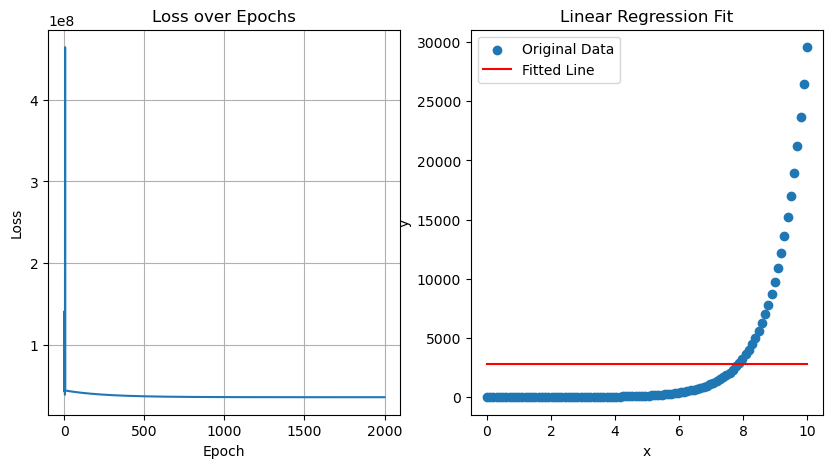

Model Parameters:
model.0.weight: tensor([[-4.5371e+04],
        [-3.3764e+00],
        [-4.0073e+00],
        [-8.5410e+03],
        [ 1.6308e-02],
        [-2.0305e+03],
        [-7.2090e-01],
        [-8.2012e-01],
        [-4.6186e-02],
        [-5.4454e-01]])
model.0.bias: tensor([-7.5896e+03, -6.6076e-01, -3.6921e+00, -1.4301e+03, -3.3313e-01,
        -3.4027e+02, -9.1406e-01, -1.1251e-01, -4.4029e-01, -1.1066e-01])
model.2.weight: tensor([[-9.1570e+00, -1.4101e+01,  2.0146e-01, -1.8688e+00,  1.8125e-01,
         -4.7229e-01,  4.7151e-02,  1.2850e-01, -1.2415e-02,  8.2522e-02],
        [-9.1818e+00, -1.3977e+01, -2.4504e-01, -1.6931e+00,  2.2304e-01,
         -6.0164e-01, -2.4040e-01,  1.8799e-01,  1.5153e-01,  1.1692e-01],
        [-1.2352e+04,  1.5117e+01, -2.7140e-01, -3.5784e+04, -2.3007e-01,
         -2.4186e+04, -7.8980e-02,  1.7592e-01,  1.2790e-02,  2.9531e-01],
        [-1.0140e+03,  1.4004e+01, -1.9651e-01, -2.9601e+03,  6.8852e-02,
         -2.0015e+03,  1.3127e-01,  3

In [13]:
# 복습
# 1. 입출력 정의
x = torch.linspace(0, 10, 100).view(-1, 1)
y = 0.5 * (3 ** x) + 0.3 * (x ** 2) + 2 + torch.randn(100, 1) * 5 # lable

# 2. 모델 정의
class LinearRegreesionModel(nn.Module):
    def __init__(self):
        super().__init__()
        # self.linear = nn.Linear(1,1)
        # self.hidden = nn.Linear(1,10)
        # self.sigmoid = nn.Sigmoid()
        # self.output = nn.Linear(10,1)
        self.model = nn.Sequential(
            nn.Linear(1,10),
            nn.ReLU(),
            nn.Linear(10,10),
            nn.ReLU(),
            nn.Linear(10,1)
        )

    def forward(self,x):
        # return self.linear(x)
        # x = self.hidden(x)
        # x = self.sigmoid(x)
        # x = self.output(x)
        return self.model(x)
    
model = LinearRegreesionModel() # 모델 객체 생성
    
# 3. 손실함수 정의
criterion = nn.MSELoss() # 평균제곱오차

# 4. 가중치 업데이트
optimizer = optim.SGD(model.parameters(), lr=0.001) # 학습률은 모델이 커지면 커질수록 줄여야함, 확률적 경사 하강법
epochs = 2000 # 학습반복횟수
losses = [] # 시각화에 사용하기위한 손실 리스트

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화 앞전에 했던 계산을 초기화 해줘야함
    outputs = model(x) # 예측값 계산 → model의 forward 함수 실행
    loss = criterion(outputs, y) # 손실 계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item()) # 손실함수 그래프 그리기용, 시각화에 사용

    # 학습 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1} / {epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1) # l행 2열의 1번
# plt.ylim(0,5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2) # 1행 2열의 2번
plt.scatter(x.numpy(), y.numpy(), label="Original Data")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

### Train/ test set 분리
- Train set : 모델을 학습시키는 용도
- Test set : 학습된 모델이 새로운 데이터를 잘 맞추는지 확인하는 용도

Epoch [100/2000], Loss:  4.4148
Epoch [200/2000], Loss:  4.2490
Epoch [300/2000], Loss:  4.1909
Epoch [400/2000], Loss:  4.1705
Epoch [500/2000], Loss:  4.1634
Epoch [600/2000], Loss:  4.1609
Epoch [700/2000], Loss:  4.1600
Epoch [800/2000], Loss:  4.1597
Epoch [900/2000], Loss:  4.1596
Epoch [1000/2000], Loss:  4.1595
Epoch [1100/2000], Loss:  4.1595
Epoch [1200/2000], Loss:  4.1595
Epoch [1300/2000], Loss:  4.1595
Epoch [1400/2000], Loss:  4.1595
Epoch [1500/2000], Loss:  4.1595
Epoch [1600/2000], Loss:  4.1595
Epoch [1700/2000], Loss:  4.1595
Epoch [1800/2000], Loss:  4.1595
Epoch [1900/2000], Loss:  4.1595
Epoch [2000/2000], Loss:  4.1595
최종 Test Loss:  5.4259


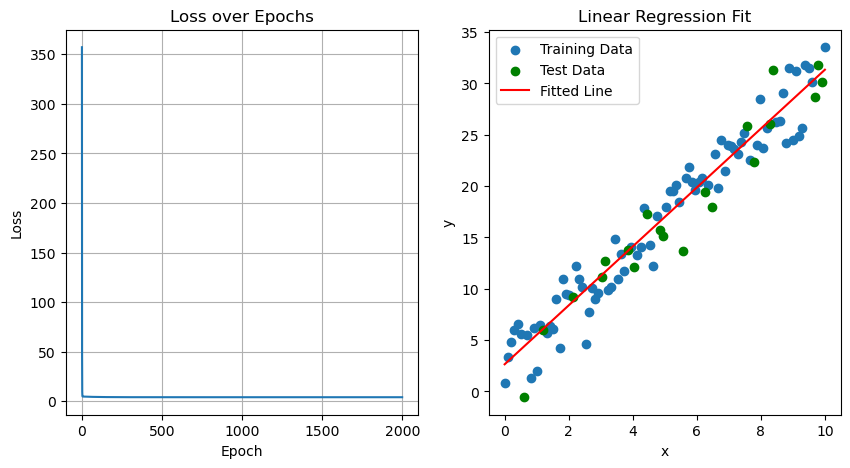

Model Parameters:
linear.weight: tensor([[2.8687]])
linear.bias: tensor([2.6462])


In [17]:
# 1. 데이터 생성
x = torch.linspace(0,10,100).view(-1,1) # 0~10사이 원소 하나씩 쪼개기, 입력 데이터
y = 3 * x + 2 + torch.randn(100, 1) * 2 # 레이블

# Train / Test set 분리 (8:2로 분리)
num_train = int(len(x) * 0.8)
indicies = torch.randperm(len(x))
train_idx, test_idx = indicies[:num_train], indicies[num_train:]
x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

# 2. 모델 정의(인공신경망 정의)
class LinearRegressionModel(nn.Module):
    def __init__(self,):
        super().__init__()
        # self.hidden = nn.Linear(1,10) # 입력 1개, 출력 10개, 다층 모델 구성
        # self.relu = nn.ReLU() # ReLU, Sigmoid 활성화 함수 적용
        # self.output = nn.Linear(10,1)
        self.linear = nn.Linear(1,1) # 가장 기본적 인공신경망, 입력 1개, 출력 1개

    def forward(self, x): # foward : 데이터를 순방향을 통과시켜줌
        return self.linear(x)
        # x = self.hidden(x)
        # x = self.relu(x)
        # x = self.output(x)
        # return x
    
model = LinearRegressionModel()

# 3. 손실함수, 옵티마이저 정의
criterion = nn.MSELoss() # 하이퍼파라미터, 평균 제곱 오차
optimizer = optim.SGD(model.parameters(), lr=0.01) # 가중치랑 편향을 넣어줌, lr : 학습률, 하이퍼파라미터, 확률적 경사 하강법

# 4. 가중치 업데이트
epochs = 2000 # 학습 반복 횟수, 하이퍼파라미터
losses = [] # 손실 담아줄 리스트

for epoch in range(epochs):
    optimizer.zero_grad() # 기울기 초기화

    outputs = model(x_train) # 예측값 계산, forward넣어주면서 순전파 진행
    loss = criterion(outputs, y_train) # 에러를 통한 손실 구함, 손실 계산
    loss.backward() # 손실을 기반으로 역전파 진행

    optimizer.step() # 가중치 업데이트

    losses.append(loss.item()) # item으로 값만 빼서 넣음

    # 백번마다 한번씩 로그 출력
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 테스트 데이터 평가
with torch.no_grad(): # 가중치 업데이트하지 않겠다, 미분 하지 않겠다
    test_output = model(x_test)
    test_loss = criterion(test_output, y_test)
print(f"최종 Test Loss: {test_loss.item(): .4f}")

# 6. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1) # l행 2열의 1번
# plt.ylim(0,5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
plt.subplot(1, 2, 2) # 1행 2열의 2번
plt.scatter(x_train.numpy(), y_train.numpy(), label="Training Data")
plt.scatter(x_test.numpy(), y_test.numpy(), label="Test Data", color="g")
plt.plot(x.numpy(), model(x).detach().numpy(), color="r", label="Fitted Line")
plt.title("Linear Regression Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("Model Parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100 / 1000, Loss:  3.4406]
Epoch [200 / 1000, Loss:  3.0435]
Epoch [300 / 1000, Loss:  2.8391]
Epoch [400 / 1000, Loss:  2.6779]
Epoch [500 / 1000, Loss:  2.5499]
Epoch [600 / 1000, Loss:  2.4482]
Epoch [700 / 1000, Loss:  2.3674]
Epoch [800 / 1000, Loss:  2.3030]
Epoch [900 / 1000, Loss:  2.2517]
Epoch [1000 / 1000, Loss:  2.2108]


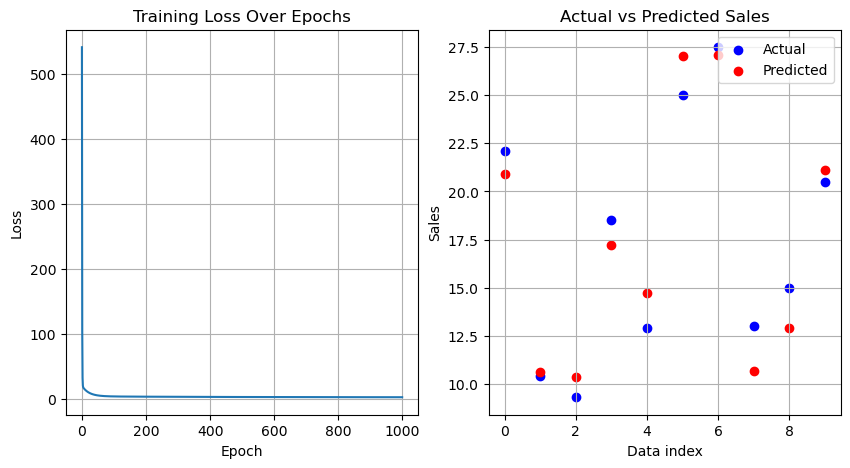

학습된 모델의 파라미터:
linear.weight: tensor([[ 0.2069,  0.4160, -0.0105]])
linear.bias: tensor([0.4744])


In [33]:
# 데이터 정의 (10개 샘플)
x = torch.tensor([[50.0, 25.0, 30.0],
                    [10.0, 20.0, 25.0],
                    [5.0, 22.0, 30.0],
                    [30.0, 26.0, 28.0],
                    [40.0, 15.0, 28.0],
                    [60.0, 35.0, 40.0],
                    [70.0, 30.0, 35.0],
                    [20.0, 15.0, 20.0],
                    [25.0, 18.0, 22.0],
                    [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                    [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

# 손실함수
criterion = nn.MSELoss()

# 기울기 업데이트(학습)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad() # 가중치(기울기)초기화
    outputs = model(x) # 모델 예측
    loss = criterion(outputs, y) # 손실계산
    loss.backward() # 역전파
    optimizer.step() # 가중치 업데이트

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1} / {epochs}, Loss: {loss.item(): .4f}]")
        
# 결과분석/ 결과 시각화
# 손실 감소 그래프
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
predicted = model(x).detach().numpy()
actual = y.numpy()
plt.subplot(1,2,2)
plt.scatter(range(len(actual)), actual, label="Actual", color="b")
plt.scatter(range(len(predicted)), predicted, color="r",label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Data index")
plt.ylabel("Sales")
plt.grid()
plt.legend()
plt.show()


print("학습된 모델의 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

Epoch [100/1000], Loss:  5.3239
Epoch [200/1000], Loss:  4.6926
Epoch [300/1000], Loss:  4.1989
Epoch [400/1000], Loss:  3.8078
Epoch [500/1000], Loss:  3.4977
Epoch [600/1000], Loss:  3.2518
Epoch [700/1000], Loss:  3.0568
Epoch [800/1000], Loss:  2.9020
Epoch [900/1000], Loss:  2.7790
Epoch [1000/1000], Loss:  2.6812


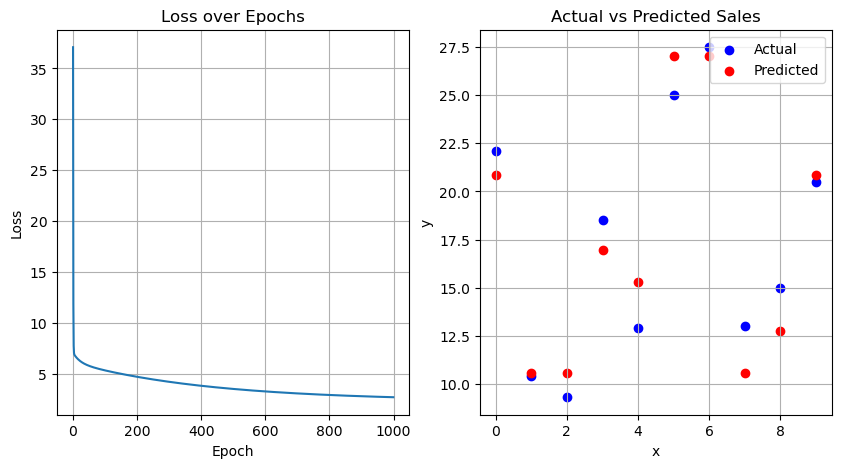

학습된 모델의 파라미터:
linear.weight: tensor([[0.2063, 0.3382, 0.0742]])
linear.bias: tensor([-0.1175])


In [35]:
# 1. 데이터 입출력 정의
x = torch.tensor([[50.0, 25.0, 30.0],
                    [10.0, 20.0, 25.0],
                    [5.0, 22.0, 30.0],
                    [30.0, 26.0, 28.0],
                    [40.0, 15.0, 28.0],
                    [60.0, 35.0, 40.0],
                    [70.0, 30.0, 35.0],
                    [20.0, 15.0, 20.0],
                    [25.0, 18.0, 22.0],
                    [45.0, 28.0, 30.0]], dtype=torch.float32)

y = torch.tensor([[22.1], [10.4], [9.3], [18.5], [12.9], 
                    [25.0], [27.5], [13.0], [15.0], [20.5]], dtype=torch.float32)

# 2. 모델 정의
class MultipleLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x):
        return self.linear(x)

model = MultipleLinearRegression()

# 3. 손실함수 정의
criterion = nn.MSELoss()

# 4. 기울기 업데이트(학습)
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 1000
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item(): .4f}")

# 5. 결과 시각화
plt.figure(figsize=(10,5))

# 손실 감소 그래프
plt.subplot(1, 2, 1)
# plt.ylim(0,5)
plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

# 데이터와 예측 결과
predicted = model(x).detach().numpy()
actual = y.numpy()

plt.subplot(1, 2, 2)
plt.scatter(range(len(actual)), actual, label="Actual", color="b")
plt.scatter(range(len(predicted)), predicted, label="Predicted", color="r")
plt.title("Actual vs Predicted Sales")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

plt.show()

print("학습된 모델의 파라미터:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")